In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond12.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:14:09 CET,1,27.0,100,0.000,6.05951,0.00013,90,50,14.64,28.6
1,2021-06-25 15:14:28 CET,2,27.0,100,1.027,6.00049,0.00000,201,50,14.64,28.6
2,2021-06-25 15:14:53 CET,3,27.0,100,0.000,6.07766,0.00001,112,50,14.64,28.6
3,2021-06-25 15:15:49 CET,4,27.0,100,0.000,6.05043,0.00012,153,50,14.64,28.6
4,2021-06-25 15:18:36 CET,5,27.0,100,0.000,6.06858,0.00027,272,50,14.64,28.6


In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [6]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

In [7]:
df_raw1.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,3590.000000,3590.000000,3590.000000,3590.000000,3.590000e+03,3590.000000,3590.0,3590.000000,3590.000000
mean,25.863196,51.737047,19.402811,6.048149,1.750208e+08,1093.273259,50.0,39.457959,547.709719
std,2.612486,5.965064,5.765773,0.496000,7.317914e+09,248.017126,0.0,3.819124,122.575264
min,-127.000000,51.000000,0.000000,4.774840,0.000000e+00,0.000000,50.0,14.640000,28.600000
25%,25.500000,51.000000,15.961500,5.719050,0.000000e+00,971.000000,50.0,39.959290,576.428600
50%,25.875000,51.000000,18.306000,6.082200,3.890695e+00,1040.000000,50.0,41.267134,605.357114
75%,26.375000,51.000000,21.778000,6.468060,3.608240e+01,1163.000000,50.0,41.396420,613.142800
max,27.125000,100.000000,42.261000,6.940160,4.260000e+11,4095.000000,50.0,41.662130,620.928500


<AxesSubplot:>

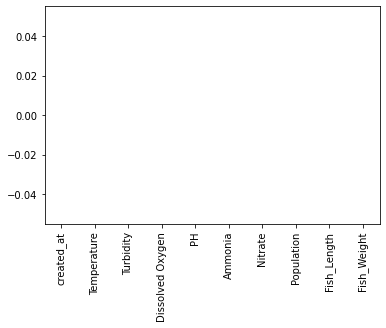

In [8]:
df_raw1.isna().sum().plot.bar()

In [9]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-9-ddfaef0134c5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)


In [10]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [11]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [12]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,27.0,100,0.000,6.05951,0.00013,90,50,14.64,28.6,2021-06-25 15:14:09,2021-06-25,15:14:09
1,27.0,100,1.027,6.00049,0.00000,201,50,14.64,28.6,2021-06-25 15:14:28,2021-06-25,15:14:28
2,27.0,100,0.000,6.07766,0.00001,112,50,14.64,28.6,2021-06-25 15:14:53,2021-06-25,15:14:53
3,27.0,100,0.000,6.05043,0.00012,153,50,14.64,28.6,2021-06-25 15:15:49,2021-06-25,15:15:49
4,27.0,100,0.000,6.06858,0.00027,272,50,14.64,28.6,2021-06-25 15:18:36,2021-06-25,15:18:36


Sort DataFrame by Date (Datetime)

In [13]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [14]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,3590.0000,3590.0000,3590.0000,3590.0000,3590.0000,3590.0000,3590.0000,3590.0000,3590.0000,3590
mean,25.8632,51.7370,19.4028,6.0481,175020822.4040,1093.2733,50.0000,39.4580,547.7097,2021-11-20 11:45:49.221727232
min,-127.0000,51.0000,0.0000,4.7748,0.0000,0.0000,50.0000,14.6400,28.6000,2021-05-12 00:00:00
25%,25.5000,51.0000,15.9615,5.7191,0.0000,971.0000,50.0000,39.9593,576.4286,2021-10-24 00:00:00
50%,25.8750,51.0000,18.3060,6.0822,3.8907,1040.0000,50.0000,41.2671,605.3571,2021-12-19 00:00:00
75%,26.3750,51.0000,21.7780,6.4681,36.0824,1163.0000,50.0000,41.3964,613.1428,2022-01-16 00:00:00
max,27.1250,100.0000,42.2610,6.9402,426000000000.0000,4095.0000,50.0000,41.6621,620.9285,2022-02-01 00:00:00
std,2.6125,5.9651,5.7658,0.4960,7317914413.8024,248.0171,0.0000,3.8191,122.5753,NaN


We have 89798 records in total.  There are 55 records where Ammonia reading is missing. Start date- 19th of June,'21 and end date- 5th of Sep,'21

In [15]:
d=df["Date"].unique()
print(len(d))
d

9


array([datetime.date(2021, 5, 12), datetime.date(2021, 6, 25),
       datetime.date(2021, 7, 11), datetime.date(2021, 10, 10),
       datetime.date(2021, 10, 24), datetime.date(2021, 11, 21),
       datetime.date(2021, 12, 19), datetime.date(2022, 1, 16),
       datetime.date(2022, 2, 1)], dtype=object)

The dates are not suitable for mapping fish weight . Hence furthur cleaning was not pursued.